In [2]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np


In [3]:
TRAIN_DIR= 'images/train'
TEST_DIR= 'images/test'

In [4]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [5]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [6]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [7]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [8]:
print(test)
print(test['image'])

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7061    images/test\surprise\9806.jpg
7062    images/test\surprise\9830.jpg
7063    images/test\surprise\9853.jpg
7064    images/test\surprise\9878.jpg
7065     images/test\surprise\993.jpg
Name:

In [9]:
from tqdm.notebook import tqdm
from tensorflow.keras.preprocessing.image import load_img
!pip install pillow


In [10]:

!pip install pillow


In [11]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,color_mode="grayscale" )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [12]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

In [13]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [14]:
x_train = train_features/255.0
x_test = test_features/255.0


In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [17]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [18]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [19]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

C:\Users\Jaskaran Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])  # Use a list instead of a string


In [21]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 


Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 239s 1s/step - accuracy: 0.2271 - loss: 1.8400 - val_accuracy: 0.2583 - val_loss: 1.8125
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 237s 1s/step - accuracy: 0.2504 - loss: 1.8076 - val_accuracy: 0.2710 - val_loss: 1.7523
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 1051s 5s/step - accuracy: 0.2852 - loss: 1.7353 - val_accuracy: 0.3725 - val_loss: 1.5967
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 217s 960ms/step - accuracy: 0.3522 - loss: 1.6235 - val_accuracy: 0.4380 - val_loss: 1.4468
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 233s 1s/step - accuracy: 0.4103 - loss: 1.5193 - val_accuracy: 0.4783 - val_loss: 1.3648
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - accuracy: 0.4350 - loss: 1.4515 - val_accuracy: 0.4888 - val_loss: 1.3179
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 239s 1s/step - accuracy: 0.4574 - loss: 1.4082 - val_accuracy: 0.5001 - val_loss: 1.2915
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 241s 1s/step - accuracy: 0.4650 - loss: 1.377

In [22]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [23]:
from keras.models import model_from_json

In [25]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")


In [26]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [29]:
def ef(image):
    img = load_img(image,color_mode="grayscale" )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [34]:
image = 'images/train/sad/54.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
model prediction is  sad


In [36]:
!pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 7.2 MB/s eta 0:00:01
   ------- -------------------------------- 1.6/8.1 MB 7.6 MB/s eta 0:00:01
   -------------- ------------------------- 2.9/8.1 MB 5.4 MB/s eta 0:00:01
   ---------------- ----------------------- 3.4/8.1 MB 4.4 MB/s eta 0:00:02
   ------------------- -------------------- 3.9/8.1 MB 4.1 MB/s eta 0:00:02
   ---------------------- ----------------- 4.5/8.1 MB 3.7 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.1 MB 3.5 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/8.1 MB 3.3 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.1 MB 3.1 MB/s eta 0:00:01
   ----------------------------- ---------- 6.0/8.1 MB 3.0 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.1 MB 3.0 MB/s eta 0:00:01
   ----------------------------------- ---- 7.1/8.1 MB 2.9 MB/s eta 0:00:01
   ----------------

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
model prediction is  sad


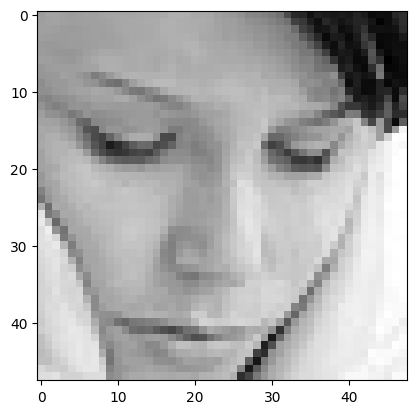

In [37]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
model prediction is  sad


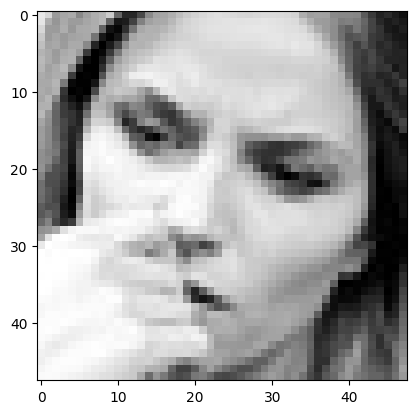

In [38]:
image = 'images/train/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')


original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
model prediction is  disgust


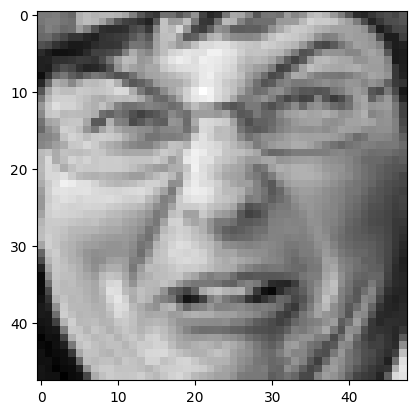

In [39]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')